In [1]:
import os
import sys
import pylab as pl
import numpy as np
import matplotlib.pyplot as plt

from   astropy.table import Table

In [2]:
os.environ['CODE_ROOT'] = os.environ['HOME'] + '/DESI/'

sys.path.append(os.environ['CODE_ROOT'])

In [3]:
import pubplot

from   vmaxer import vmaxer
from   smith_kcorr import test_plots, test_nonnative_plots
from   cosmo import distmod, volcom
from   lumfn import lumfn
from   schechter import named_schechter

In [4]:
gama_zmax = Table.read(os.environ['HOME'] + '/data/GAMA4/gama_gold_zmax.fits')
gama_zmax

CATAID,OBJID,RA,DEC,R_PETRO,ZGAMA,NQ,SPECID,SURVEY_CLASS,UMAG_DRED_SDSS,GMAG_DRED_SDSS,RMAG_DRED_SDSS,IMAG_DRED_SDSS,ZMAG_DRED_SDSS,LUMDIST,DISTMOD,FIELD,CARTESIAN_X,CARTESIAN_Y,CARTESIAN_Z,GMR,REST_GMR_0P1,REST_GMR_0P1_WARN,REST_GMR_0P1_INDEX,KCORR_R0P1,KCORR_G0P1,KCORR_R0P0,KCORR_G0P0,REST_GMR_0P0,Q_COLOR_0P0,EQ_ALL_0P0,EQ_COLOR_0P0,MALL_0P0,MCOLOR_0P0,Z_THETA_QALL,Z_THETA_QCOLOR,DDPKCORR_R0P1,DDPKCORR_G0P1,DDPKCORR_R0P0,DDPKCORR_G0P0,DDPMALL_0P0,DELTA_RPETRO_FAINT,ZMAX,ZMAX_WARN,DELTA_RPETRO_BRIGHT,ZMIN,ZMIN_WARN
,,deg,deg,mag,,,,,mag,mag,mag,mag,mag,Mpc,,,,,,mag,,,,,,,,mag,mag,,,mag,mag,,,,,,,mag,mag,,,mag,,
int32,int64,float64,float64,float32,float32,int16,bytes33,int16,float32,float32,float32,float32,float32,float64,float64,bytes4,float64,float64,float64,float32,float64,int32,int64,float64,float64,float64,float64,float64,float64,float32,float32,float64,float64,float64,float64,float64,float64,float64,float64,float64,float32,float64,float64,float32,float64,float64
186621,587725041704829065,185.22637399,-1.48484552,19.707304,0.15655,4,G12_Y3_013_084,5,21.00796,20.179195,19.758118,19.538584,19.657133,526.2218840329729,38.60584452582876,G12,-452.949002915617,-41.43182242297258,-11.790018871544799,0.42107773,0.3371333695571266,0,2,-0.11110247733432752,-0.027158118619969737,0.06198855923223209,0.15099516113794287,0.33207112636577363,2.12,-0.15185352,-0.331886,-18.808675567508615,-18.628643090725816,38.51597956836311,38.33594709158031,-0.06727912768008276,0.029344341562804438,0.14944575068211835,0.29451963127646774,-18.8961327589585,0.092695236,0.16392420521119658,0.0,-7.707304,0.0044451611497400645,0.0
543518,588848898852848091,211.76792957,-0.89235905,19.017689,0.05258,4,G15_Y3_013_228,6,20.9524,19.807358,19.110891,18.695219,18.314579,164.25889781301044,36.07764452179613,G15,-132.65873114579134,-82.14913456297639,-2.4303746870844907,0.69646645,0.7649974613944354,0,5,-0.15789098198346954,-0.22642199745535949,0.06992529999751626,0.0987676138300845,0.6676241320902834,0.8,-0.0510026,-0.042064,-17.078878471273992,-17.087817070651862,36.09656722249469,36.10550582187256,-0.14680015512782418,-0.19364531489911876,0.06992472323437693,0.07152997481454451,-17.07887789451085,0.7823105,0.0739139156122269,0.0,-7.0176888,0.002186226246885435,0.0
145492,587724650869751862,184.80116057,-1.36268178,18.077238,0.10614,4,G12_Y1_IS1_187,6,19.808687,18.545658,18.033491,17.711723,17.538279,344.76795967919503,37.68763449369432,G12,-310.50414838876634,-26.080095695731455,-7.412209189910756,0.512167,0.5042607723990307,0,3,-0.1005257374319281,-0.09261953290224781,0.09945360289805828,0.13844408330998506,0.4731764965167842,2.12,-0.1029558,-0.22501679,-19.606894210431527,-19.484833226058434,37.68413229331727,37.56207130894418,-0.09889375873716971,-0.09026459990901585,0.1178311196250314,0.1749106898046474,-19.6252717271585,1.7227612,0.24168470123991342,0.0,-6.077238,0.006586003369639508,0.0
136410,587724650328490122,174.75681895,-1.77149809,18.929632,0.10328,5,369383993293957120,6,19.882893,19.167995,18.922789,18.57444,18.607363,334.80363253505897,37.623950806662464,G12,-302.0479121081842,27.718053402410643,-9.381089858155741,0.24520683,0.24179980777578158,0,2,-0.10417277610092178,-0.10076575099096118,0.060910488024232726,0.05270176921079077,0.25341555169918417,2.12,-0.1001816,-0.2189536,-18.655047505855464,-18.536275513231658,37.58467969274511,37.465907700121306,-0.1010062713102715,-0.09646160454835392,0.11571860705192961,0.16871368516530935,-18.709855624883158,0.87036705,0.15849151887991855,0.0,-6.929632,0.004259084349086572,0.0
3854067,588010930294358518,130.11971293,-1.67349372,19.1169,0.23578,4,G09_Y4_233_079,6,20.588625,19.796408,19.077488,18.744814,18.56107,832.7157631522992,39.602483929243604,G9,-434.0272135973507,515.0641120150214,-19.67865112089697,0.71891975,0.46062719543598274,0,3,-0.0858318620858185,0.17246069650651913,0.10674750418857665,0.3884501181232859,0.43721714009361107,2.12,-0.22870661,-0.49985358,-20.363625329892713,-20.092478361885625,3

In [5]:
gama_vmax = Table.read(os.environ['HOME'] + '/data/GAMA4/gama_gold_vmax.fits')
gama_vmax

ZGAMA,ZMIN,ZMAX,MCOLOR_0P0,VMAX,VZ
,,,mag,,
float32,float64,float64,float64,float64,float64
0.15655,0.03903000056743622,0.16392420521119658,-18.628643090725816,1938744.2553151867,1692914.8221834349
0.05258,0.03903000056743622,0.0739139156122269,-17.087817070651862,161906.26051134185,40824.56513655541
0.10614,0.03903000056743622,0.24168470123991342,-19.484833226058434,5971110.734171794,524787.6872112361
0.10328,0.03903000056743622,0.15849151887991855,-18.536275513231658,1755600.7496031362,482128.5933214005
0.23578,0.03903000056743622,0.26298999786376953,-20.092478361885625,7594841.612883208,5563439.053892887
0.26182,0.03903000056743622,0.26298999786376953,-21.056077673993215,7594841.612883208,7499327.902770107
0.1357,0.03903000056743622,0.26298999786376953,-19.94891417349914,7594841.612883208,1107198.6172626077
0.05371,0.03903000056743622,0.07804687277456436,-17.081046692078406,195139.4244464204,45350.80907439499


Text(0.5, 0, 'ZMAX')

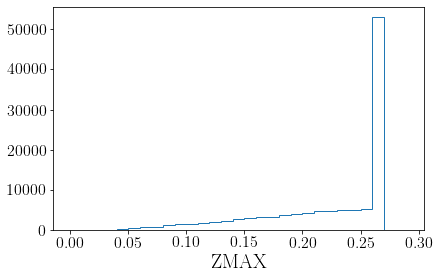

In [6]:
_ = pl.hist(gama_vmax['ZMAX'], bins=np.arange(0.0, 0.3, 0.01), histtype='step')
pl.xlabel('ZMAX')

In [7]:
np.unique(gama_vmax['ZMIN'].data)

array([0.03903   , 0.03981007])

Text(0, 0.5, '$z_{\\rm max}$')

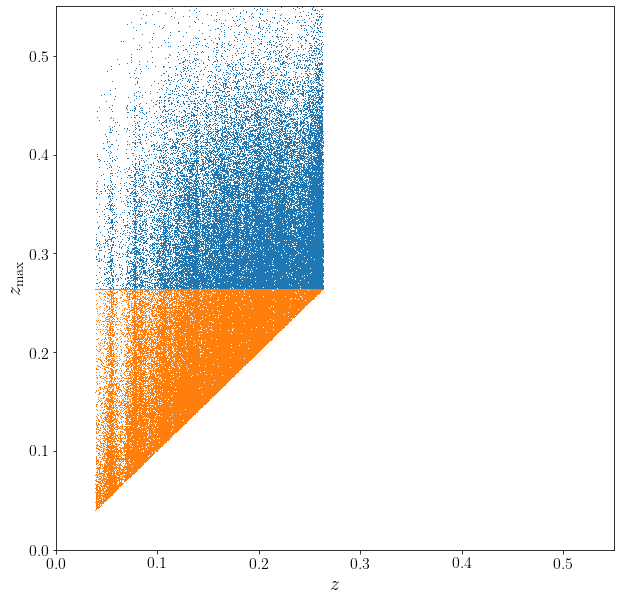

In [10]:
fig, ax = plt.subplots(1,1,figsize=(10,10))

ax.plot(gama_zmax['ZGAMA'], gama_zmax['ZMAX'], marker=',', lw=0.0)
ax.plot(gama_vmax['ZGAMA'], gama_vmax['ZMAX'], marker=',', lw=0.0)

# ax.axvline(zmin, c='k', lw=0.5) 
# ax.axvline(zmax, c='k', lw=0.5) 
 
# ax.axhline(zmin, c='k', lw=0.5) 
# ax.axhline(zmax, c='k', lw=0.5) 

ax.set_xlim(0.0, 0.55)
ax.set_ylim(0.0, 0.55)

ax.set_xlabel(r'$z$')
ax.set_ylabel(r'$z_{\rm max}$')

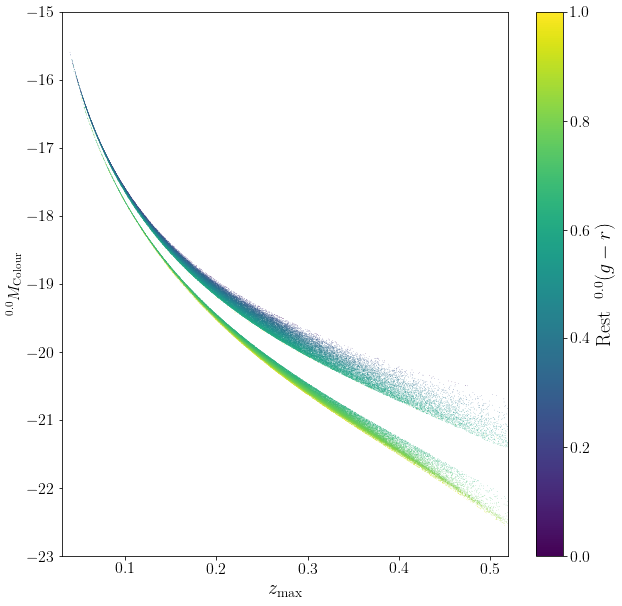

In [14]:
fig, ax = plt.subplots(1,1,figsize=(10,10))

sc = ax.scatter(gama_zmax['ZMAX'], gama_zmax['MCOLOR_0P0'], marker='.', lw=0.0, s=1, c=gama_zmax['REST_GMR_0P0'], vmin=0.0, vmax=1.0)

ax.set_xlim(0.03, 0.52)
ax.set_ylim(-23., -15.)

ax.set_xlabel(r'$z_{\rm max}$')
ax.set_ylabel(r'$^{0.0}M_{\rm Colour}$', fontsize=16)

plt.colorbar(sc, label='Rest \ $^{0.0}(g-r)$')

Text(0, 0.5, 'DEC [deg.]')

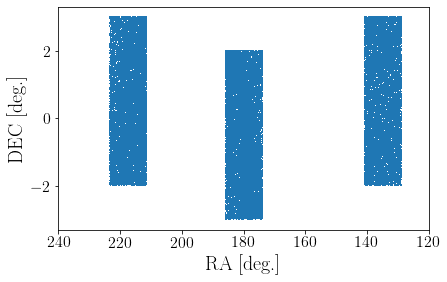

In [18]:
pl.plot(gama_zmax['RA'], gama_zmax['DEC'], marker=',', lw=0.0)

pl.xlim(240., 120.)

pl.xlabel('RA [deg.]')
pl.ylabel('DEC [deg.]')

In [19]:
gama_lf = Table.read(os.environ['HOME'] + '/data/GAMA4/gama_gold_lumfn.fits')
gama_lf

MEDIAN_M,PHI_N,PHI_N_ERROR,PHI_IVMAX,PHI_IVMAX_ERROR,N,V_ON_VMAX
float64,float64,float64,float64,float64,float64,float64
--,0.0,0.0,0.0,0.0,0.0,--
--,0.0,0.0,0.0,0.0,0.0,--
--,0.0,0.0,0.0,0.0,0.0,--
--,0.0,0.0,0.0,0.0,0.0,--
--,0.0,0.0,0.0,0.0,0.0,--
--,0.0,0.0,0.0,0.0,0.0,--
--,0.0,0.0,0.0,0.0,0.0,--
--,0.0,0.0,0.0,0.0,0.0,--
--,0.0,0.0,0.0,0.0,0.0,--


/tmp/ipykernel_144678/3573005910.py:6: RuntimeWarning: divide by zero encountered in log10
  pl.plot(gama_lf['MEDIAN_M'], np.log10(gama_lf['PHI_N']), label='RAW', lw=1.)
/tmp/ipykernel_144678/3573005910.py:7: RuntimeWarning: divide by zero encountered in log10
  pl.plot(gama_lf['MEDIAN_M'], np.log10(gama_lf['PHI_IVMAX']), label='IVMAX', lw=1.)


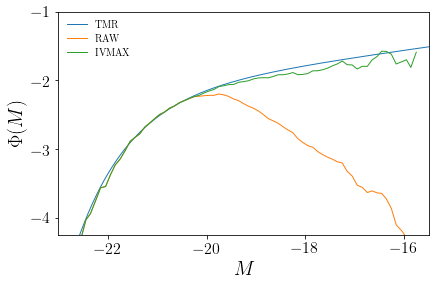

In [28]:
Ms = np.arange(-23., -15., 0.01)
sc = named_schechter(Ms, named_type='TMR')

pl.plot(Ms, np.log10(sc), label='TMR', lw=1.)

pl.plot(gama_lf['MEDIAN_M'], np.log10(gama_lf['PHI_N']), label='RAW', lw=1.)
pl.plot(gama_lf['MEDIAN_M'], np.log10(gama_lf['PHI_IVMAX']), label='IVMAX', lw=1.)

pl.xlabel(r'$M$')
pl.ylabel(r'$\Phi(M)$')

pl.ylim(-4.25, -1.)
pl.xlim(-23., -15.5)

pl.legend(frameon=False, loc=2)

Text(0.5, 0, '$V/V_{Max}$')

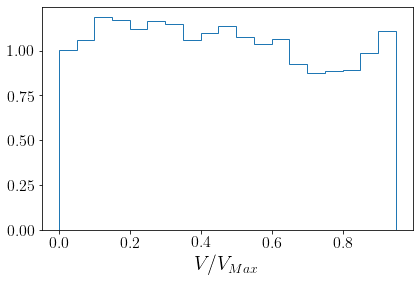

In [32]:
_ = pl.hist(gama_vmax['VZ'] / gama_vmax['VMAX'], bins=np.arange(0.0, 1.0, 0.05), histtype='step', density=True)

pl.xlabel('$V/V_{Max}$')

In [35]:
spurious = gama_zmax[gama_zmax['ZMAX_WARN'] > 0.0]
spurious.sort('R_PETRO')
spurious

CATAID,OBJID,RA,DEC,R_PETRO,ZGAMA,NQ,SPECID,SURVEY_CLASS,UMAG_DRED_SDSS,GMAG_DRED_SDSS,RMAG_DRED_SDSS,IMAG_DRED_SDSS,ZMAG_DRED_SDSS,LUMDIST,DISTMOD,FIELD,CARTESIAN_X,CARTESIAN_Y,CARTESIAN_Z,GMR,REST_GMR_0P1,REST_GMR_0P1_WARN,REST_GMR_0P1_INDEX,KCORR_R0P1,KCORR_G0P1,KCORR_R0P0,KCORR_G0P0,REST_GMR_0P0,Q_COLOR_0P0,EQ_ALL_0P0,EQ_COLOR_0P0,MALL_0P0,MCOLOR_0P0,Z_THETA_QALL,Z_THETA_QCOLOR,DDPKCORR_R0P1,DDPKCORR_G0P1,DDPKCORR_R0P0,DDPKCORR_G0P0,DDPMALL_0P0,DELTA_RPETRO_FAINT,ZMAX,ZMAX_WARN,DELTA_RPETRO_BRIGHT,ZMIN,ZMIN_WARN
,,deg,deg,mag,,,,,mag,mag,mag,mag,mag,Mpc,,,,,,mag,,,,,,,,mag,mag,,,mag,mag,,,,,,,mag,mag,,,mag,,
int32,int64,float64,float64,float32,float32,int16,bytes33,int16,float32,float32,float32,float32,float32,float64,float64,bytes4,float64,float64,float64,float32,float64,int32,int64,float64,float64,float64,float64,float64,float64,float32,float32,float64,float64,float64,float64,float64,float64,float64,float64,float64,float32,float64,float64,float32,float64,float64
185322,587725041702469675,179.83440251,-1.64817036,14.160493,0.08135,5,372775163474765824,6,17.064615,15.692654,14.905519,14.343366,14.213043,259.6079029836754,37.07158954561004,G12,-239.97727236461046,0.6935893874232879,-6.905119636685518,0.7871351,0.8222150124783408,0,5,-0.12544319185352298,-0.160523080125354,0.10303089196510218,0.18560737233721386,0.7045586438344313,0.8,-0.0789095,-0.06508,-22.935218039108076,-22.949047538591184,37.09571093614177,37.10954043562488,-0.11872379703855176,-0.14155580081515584,0.09800108132364935,0.12361948889850743,-22.930188228466623,5.6395063,-99.0,2.0,-2.160493,0.03154120966707457,0.0
178839,587725041166581794,182.1835035,-2.07231294,14.328211,0.10734,4,G12_Y6_041_249,6,24.575645,17.823496,16.785114,15.850774,18.088587,348.95950671254064,37.71387517159247,G12,-314.6983622428863,-11.998751500068654,-11.395465440223349,1.0383816,1.0190980480456595,0,6,-0.09298329526027885,-0.07369976676785223,0.14283969236353414,0.32678700770193425,0.8544342611996858,0.8,-0.1041198,-0.085872,-23.424384233236342,-23.442632031321555,37.75259506392482,37.770842862010035,-0.09801980357535564,-0.0876437071781144,0.11870507478684547,0.17753158253554888,-23.400249615659654,5.4717884,-99.0,2.0,-2.3282108,0.039334234229219986,0.0
125489,587724649258876969,184.17810296,-2.69967347,14.425353,0.25162,4,G12_Y4_203_103,6,15.559951,15.755173,14.309496,28.205227,16.762774,896.9591792306916,39.76386339337955,G12,-713.9407537359408,-52.154217318169536,-33.75421886554996,1.4456768,0.9922763000644923,0,6,0.11573660675273972,0.5691371102771148,0.34863479662419555,0.9652536473961288,0.829057952816934,0.8,-0.24407141,-0.201296,-25.44307373066556,-25.48584913809907,39.868426780897494,39.911202188331,-0.018670125386448577,0.29021962938141105,0.19805475297575253,0.5553949190950743,-25.292493687017117,5.374646,-99.0,2.0,-2.425353,0.09538586652718395,0.0
718921,587726031728017438,217.2773885,1.28502947,14.456577,0.08647,3,NED_MRK_1383,4,14.399254,14.418312,14.378856,13.8610735,14.046887,276.9712644440074,37.212173568413235,G15,-202.7981329939006,-154.36433581903054,5.717037181843526,0.039456367,0.05020904994649686,0,1,-0.0982779198530405,-0.10903060230686158,0.06300279945333358,0.018814009181763167,0.08364515776424619,2.12,-0.0838759,-0.1833164,-22.734723164844088,-22.635282672154478,37.19130046586948,37.09185997317987,-0.11433057873334761,-0.13142393692472373,0.1023942996288535,0.13375135278893954,-22.774114665019606,5.343422,1.1327446851177603,1.0,-2.4565773,0.027777561711799695,0.0
423776,587728879796093009,137.38205797,2.9559053,14.904024,0.14906,4,G09_Y1_FX1_283,6,16.738531,15.69086,14.949677,14.424865,14.620418,498.5745074806278,38.488650344529816,G9,-318.87403319626134,293.4040460252725,22.374975832994306,0.7411823,0.6530574215121244,0,4,-0.0658698376204572,0.022255068137926215,0.15431270736417704,0.30596734437310263,0.5895276902615822,2.12,-0.1445882,-0.31600717,-23.594350725510402,-23.42293176064758,38.49837484965591,38.32695588479309,-0.07143751043127876,0.0104514

In [36]:
spurious = gama_zmax[gama_zmax['ZMIN_WARN'] > 0.0]
spurious.sort('R_PETRO')
spurious

CATAID,OBJID,RA,DEC,R_PETRO,ZGAMA,NQ,SPECID,SURVEY_CLASS,UMAG_DRED_SDSS,GMAG_DRED_SDSS,RMAG_DRED_SDSS,IMAG_DRED_SDSS,ZMAG_DRED_SDSS,LUMDIST,DISTMOD,FIELD,CARTESIAN_X,CARTESIAN_Y,CARTESIAN_Z,GMR,REST_GMR_0P1,REST_GMR_0P1_WARN,REST_GMR_0P1_INDEX,KCORR_R0P1,KCORR_G0P1,KCORR_R0P0,KCORR_G0P0,REST_GMR_0P0,Q_COLOR_0P0,EQ_ALL_0P0,EQ_COLOR_0P0,MALL_0P0,MCOLOR_0P0,Z_THETA_QALL,Z_THETA_QCOLOR,DDPKCORR_R0P1,DDPKCORR_G0P1,DDPKCORR_R0P0,DDPKCORR_G0P0,DDPMALL_0P0,DELTA_RPETRO_FAINT,ZMAX,ZMAX_WARN,DELTA_RPETRO_BRIGHT,ZMIN,ZMIN_WARN
,,deg,deg,mag,,,,,mag,mag,mag,mag,mag,Mpc,,,,,,mag,,,,,,,,mag,mag,,,mag,mag,,,,,,,mag,mag,,,mag,,
int32,int64,float64,float64,float32,float32,int16,bytes33,int16,float32,float32,float32,float32,float32,float64,float64,bytes4,float64,float64,float64,float32,float64,int32,int64,float64,float64,float64,float64,float64,float64,float32,float32,float64,float64,float64,float64,float64,float64,float64,float64,float64,float32,float64,float64,float32,float64,float64


# Done.